# `Problem Definition`

#### In this problem we have to predict the price of bulldozers using out machine learning algorithm.

# `Data`

#### The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

#### There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# `Evaluation`

#### Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: 
#### https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=['saledate'])

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


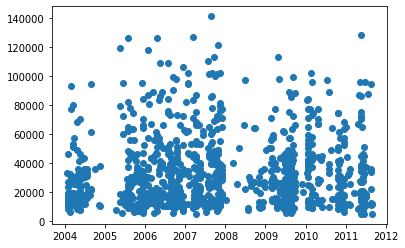

In [4]:
# lets print the sales wrt the saledate

plt.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

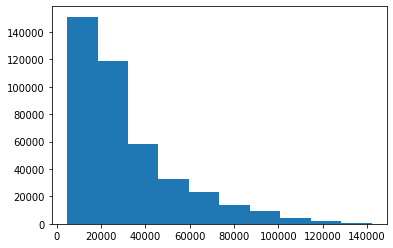

In [5]:
# lets visualize our price column

plt.hist(df["SalePrice"]);

In [6]:
# lets add instance of saledate column and remove saledate from the table

df["saleyear"]=df.saledate.dt.year
df["salemonth"]=df.saledate.dt.month
df["saleday"]=df.saledate.dt.day
df["saledayofweek"]=df.saledate.dt.day_of_week
df["saledayofyear"]=df.saledate.dt.day_of_year

In [7]:
df.drop("saledate",axis=1,inplace=True)

In [8]:
# lets find how many missing values are there

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [9]:
# lets turn every str column into categorical ones

for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()
          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [11]:
df["UsageBand"].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=True)

# lets fill our missing values now


In [12]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [13]:
# lets fill the numerical ones first

for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
#             lets make a refernce as missing first
            df[label + "is_missing"]=pd.isnull(content)
#             lets fill the row with median
            df[label]=content.fillna(content.median())

In [14]:
# lets check it
df.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [15]:
# lets fill our categorical values and also convert them to numbers

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
#         lets make a refernce column
        df[label + "is_missing"]=pd.isnull(content)
#         lets fill the data
        df[label]=pd.Categorical(content).codes+1

In [16]:
# lets save our processed data

df.to_csv('bluebook-for-bulldozers/Train_and_valid_model_ready.csv')

In [17]:
# lets make a copy of our df

df_tmp=df.copy()

# lets train our model on df_tmp

In [18]:
# lets split teh data
df_train=df_tmp[df.saleyear!=2012]
df_val=df_tmp[df.saleyear==2012]

# lets train our model

In [19]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42)

In [20]:
%%time

model.fit(df_train.drop("SalePrice",axis=1),df_train["SalePrice"])

Wall time: 2min 17s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
model.score(df_val.drop("SalePrice",axis=1),df_val["SalePrice"])

0.8724699827023497

In [22]:
# lets split the data and store them in variables

x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

In [23]:
# lets generate y_predicted values also

y_preds=model.predict(x_val)

# We want RMSLE according to our problem definition


In [24]:
# lets make a eval fn
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score

def rmsle(y_test,y_preds):
    """
    This returns the root mean squared log error score
    """
    
    return np.sqrt(mean_squared_log_error(y_val,y_preds))



def score(model):
    
    """
    This return a dict of diff scores
    """
    y_preds_t=model.predict(x_train)
    y_preds_v=model.predict(x_val)
    
    score={"Train_MAE":mean_absolute_error(y_train,y_preds_t),
           "Val_MAE":mean_absolute_error(y_val,y_preds_v),
           "Train_RMSLE":np.sqrt(mean_squared_log_error(y_train,y_preds_t)),
           "Val_RMSLE":np.sqrt(mean_squared_log_error(y_val,y_preds_v)),
           "Train_r2_score":r2_score(y_train,y_preds_t),
           "Val_r2_score":r2_score(y_val,y_preds_v)
          }
    
    return score

In [25]:
rmsle(y_val,y_preds)

0.2546446969689846

In [26]:
score(model)

{'Train_MAE': 1578.452360361484,
 'Val_MAE': 6125.117301477577,
 'Train_RMSLE': 0.0841335910166914,
 'Val_RMSLE': 0.2546446969689846,
 'Train_r2_score': 0.9875229075349308,
 'Val_r2_score': 0.8724699827023497}

# lets improve our model using hyperparameter tuning

In [27]:
# we will use RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV



In [28]:
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
         "max_features":[0.5,1,'sqrt','auto'],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_samples":[10000]
        }

In [68]:
rf_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,
                           n_iter=5,
                           cv=5,
                           verbose=True)

In [69]:
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [70]:
rf_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 5}

In [71]:
rf_y_preds=rf_model.predict(x_val)

In [82]:
score(rf_model)

{'Train_MAE': 9507.635703704753,
 'Val_MAE': 10652.43008079834,
 'Train_RMSLE': 0.4071595345702283,
 'Val_RMSLE': 0.4210538013091904,
 'Train_r2_score': 0.6374470170435436,
 'Val_r2_score': 0.6566766772144003}

In [32]:
%%time
# Still the score isn't enough good so lets tune it on more samples


ideal_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

ideal_model.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 7min 14s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
ideal_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [37]:
ideal_model_y_preds=ideal_model.predict(x_val)

In [38]:
rmsle(y_val,ideal_model_y_preds)

0.3243342583167167

# This also doesn't gave us best accuracy or score

# lets do more tuning

In [39]:
%%time
# Still the score isn't enough good so lets tune it on more samples


ideal_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=100,
                               verbose=True)

ideal_model.fit(x_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 32min 37s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [41]:
ideal_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [80]:
ideal_model.score(x_val,y_val)

0.8343419259826583

In [81]:
ideal_model_2_y_preds=ideal_model.predict(x_val)

In [82]:
score(ideal_model)

{'Train_MAE': 5813.220095879645,
 'Val_MAE': 7243.041408882745,
 'Train_RMSLE': 0.26763047607293045,
 'Val_RMSLE': 0.3006116167199929,
 'Train_r2_score': 0.8505472645491283,
 'Val_r2_score': 0.8343419259826583}

# So now we got RMSLE Value =3 which can be inreased further using more hyperparameters tuning

In [83]:
def processed_data(df):
    
#     add te instances of date
    df["saleyear"]=df.saledate.dt.year
    df["salemonth"]=df.saledate.dt.month
    df["saleday"]=df.saledate.dt.day
    df["saledayofweek"]=df.saledate.dt.day_of_week
    df["saledayofyear"]=df.saledate.dt.day_of_year
    
    
#     drop saledate column

    df.drop("saledate",axis=1,inplace=True)
    
# lets fill the numerical ones first

    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
#             lets make a refernce as missing first
                df[label + "is_missing"]=pd.isnull(content)
#             lets fill the row with median
                df[label]=content.fillna(content.median())
    
        elif not pd.api.types.is_numeric_dtype(content):
#         lets make a refernce column
            df[label + "is_missing"]=pd.isnull(content)
#         lets fill the data
            df[label]=pd.Categorical(content).codes+1
            
        
    
    

In [84]:
df_test=pd.read_csv('bluebook-for-bulldozers/Test.csv',parse_dates=["saledate"])

In [85]:
processed_data(df_test)

In [86]:
df_test.isna().sum()

SalesID                        0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 101, dtype: int64

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [88]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Columns: 102 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(2), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


### we can see that in our X_train we have 102 columns but in x_test we have only 101 columns so lets find the missing one and make a column reference to the missing one

In [89]:
set(df.columns) - set(df_test.columns)

{'SalePrice', 'auctioneerIDis_missing'}

In [90]:
df_test["auctioneerIDis_missing"]=False

In [91]:
set(df.columns) - set(df_test.columns)

{'SalePrice'}

In [92]:
# lets predict the y_preds

test_y_preds=ideal_model.predict(df_test)

C:\Users\kuldeep.garg\Documents\My_learnings\Machine_learning\MLenv\7 Bulldozer price Project\bullenv\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [93]:
df_final=pd.DataFrame({"SalesID":df_test["SalesID"],
                      "SalePrice":test_y_preds})

In [94]:
df_final

,SalesID,SalePrice
0,1227829,21923.958333
1,1227844,25173.958333
2,1227847,53721.527778
3,1227848,57783.333333
4,1227863,38486.111111
...,...,...
12452,6643171,39071.255556
12453,6643173,19666.111111
12454,6643184,19474.027778
12455,6643186,23285.555556


In [95]:
df_final.to_csv("bluebook-for-bulldozers/df_test_final.csv")

# Feature Importance

In [102]:
importances=ideal_model.best_estimator_.feature_importances_

In [103]:
importances

array([3.34746757e-02, 3.25853983e-02, 4.64929729e-02, 2.53126811e-03,
       6.77403856e-03, 1.86201043e-01, 4.61217398e-03, 1.99308497e-03,
       3.66116362e-02, 2.77742685e-02, 6.10803715e-02, 4.40455476e-03,
       1.72406939e-02, 1.39158840e-01, 4.68410806e-02, 1.17444210e-02,
       1.65895614e-03, 3.14133386e-03, 2.28049249e-03, 6.93792073e-02,
       7.24315191e-04, 1.34185700e-04, 1.40564736e-03, 9.93638868e-04,
       3.13409435e-03, 3.35066356e-04, 2.71303271e-03, 1.38487936e-02,
       2.06915353e-03, 2.31994458e-03, 4.19297367e-03, 3.72032953e-03,
       5.97868840e-03, 1.77007683e-03, 1.15086949e-03, 7.37434415e-03,
       1.74687312e-03, 1.25236314e-02, 4.88011920e-03, 5.08628140e-03,
       1.61140818e-03, 1.59691853e-03, 4.03142429e-03, 1.02216914e-03,
       9.97101020e-04, 7.79560346e-04, 1.95393575e-04, 2.78535694e-03,
       1.10985887e-03, 5.14621902e-04, 2.74612602e-04, 5.66177719e-02,
       6.72099678e-03, 1.30622177e-02, 6.66379306e-03, 1.50649554e-02,
      

In [104]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

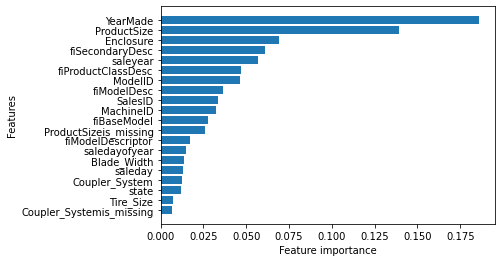

In [106]:
plot_features(x_train.columns,importances)